# 1. Import the Packages and Datasets

In [466]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Suppress all warnings
warnings.simplefilter("ignore")

# Load the dataset
file_path = '/Users/sahil/My Data/Boston Institue of Analytics/Machine learning/HR hackthon AV/train_LZdllcl (3).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1 

# 2. Perform EDA (Exploratory Data Analysis):

## Understanding the Datasets. Explore Train and Test Data and get to know what each Column / Feature denotes. Check for Imbalance of Target Column in Datasets

### Understanding the Structure of the Dataset

In [8]:
# Display the first few rows of the dataset
print(data.head())

# Get a summary of the dataset
print(data.info())

   employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1 

In [10]:
# Check for missing values
print(data.isnull().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


### Summary statistics

In [12]:
# Get descriptive statistics for numerical features
print(data.describe())

        employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min    

In [14]:
# Get descriptive statistics for categorical features

print(data.describe(include=['object', 'category']))

               department    region   education gender recruitment_channel
count               54808     54808       52399  54808               54808
unique                  9        34           3      2                   3
top     Sales & Marketing  region_2  Bachelor's      m               other
freq                16840     12343       36669  38496               30446


### Target Column Analysis

is_promoted
0    50140
1     4668
Name: count, dtype: int64


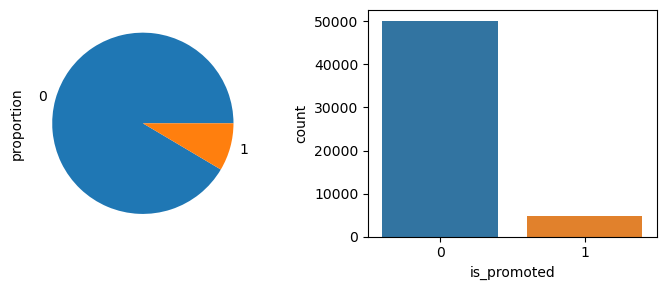

In [16]:
# Check the distribution of the target column
target_column = 'is_promoted'  
print(data[target_column].value_counts())

# chart for distribution of target variable
fig= plt.figure(figsize=(7,3) )
fig.add_subplot(1,2,1)
a= data["is_promoted"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=data["is_promoted"])
plt.tight_layout()
plt.show()

### Feature analysis:

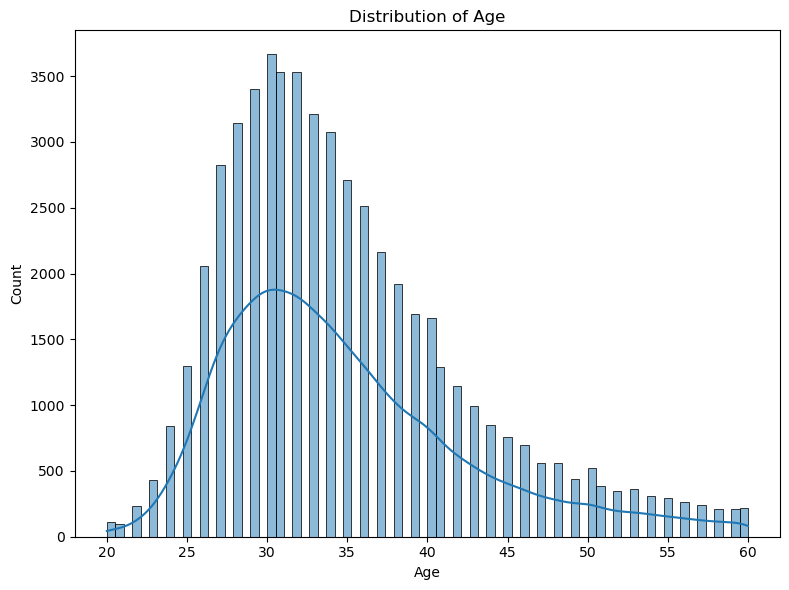

In [468]:
# Analyze the distribution of AGE.
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(8, 6))  # Set the figure size
sns.histplot(data=data, x=data["age"], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

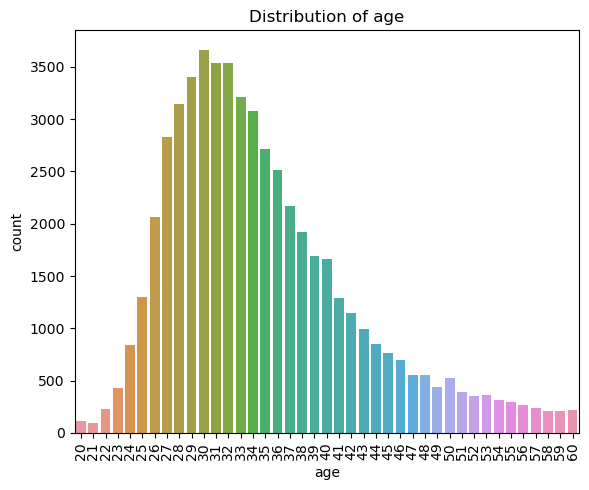

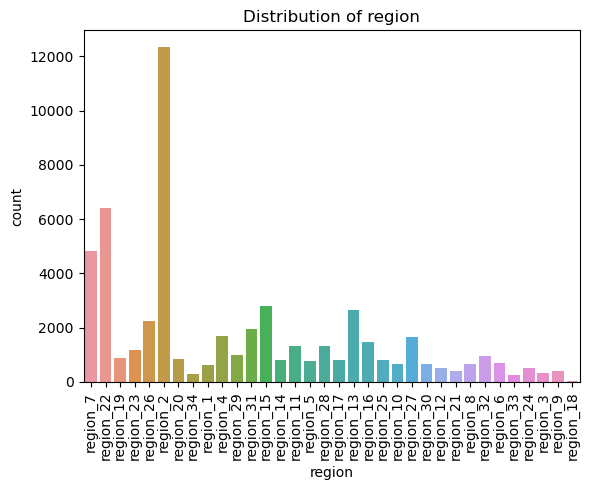

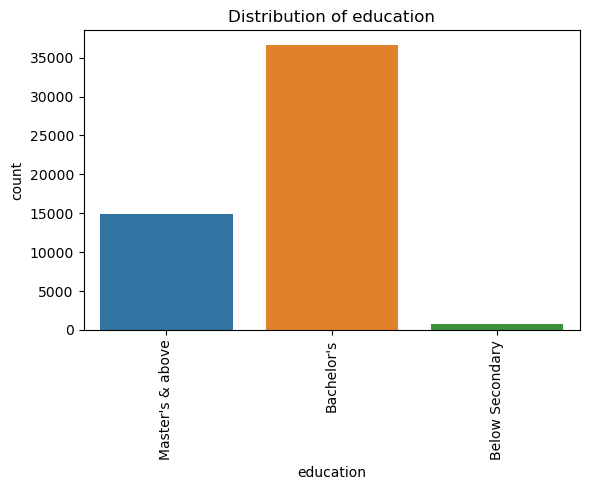

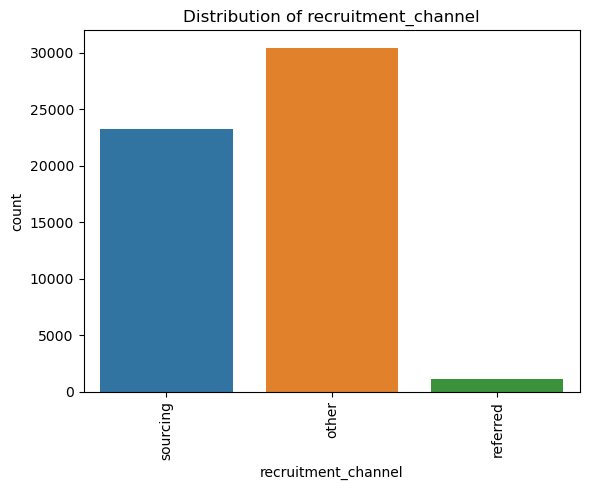

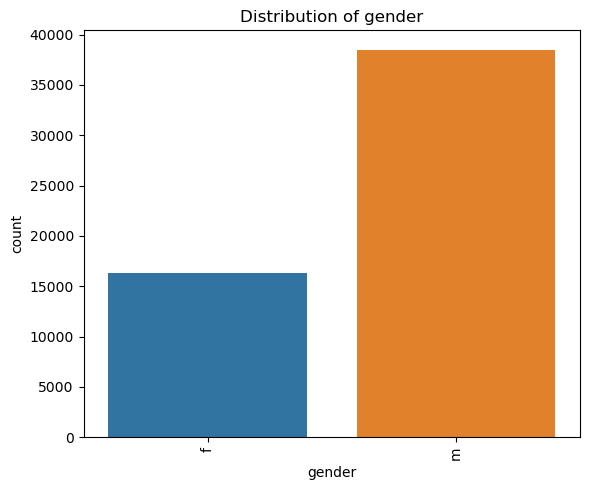

In [20]:
# Analyze the distribution of categorical features
categorical_features = ['age', 'region', 'education','recruitment_channel', 'gender']  # Define the specific features

for feature in categorical_features:
    plt.figure(figsize=(6, 5))  # Set the figure size
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

### Correlation Analysis:

In [312]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'region' is the feature containing the non-numerical values
le = LabelEncoder()
data['region'] = le.fit_transform(data['region'])

In [26]:
# Assuming 'education' is the feature containing the non-numerical values
le = LabelEncoder()
data['education'] = le.fit_transform(data['education'])

In [28]:
# Assuming 'department' is the feature containing the non-numerical values
le = LabelEncoder()
data['department'] = le.fit_transform(data['department'])

In [30]:
# Assuming 'gender' is the feature containing the non-numerical values
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

In [32]:
# Assuming 'recruitment_channel' is the feature containing the non-numerical values
le = LabelEncoder()
data['recruitment_channel'] = le.fit_transform(data['recruitment_channel'])

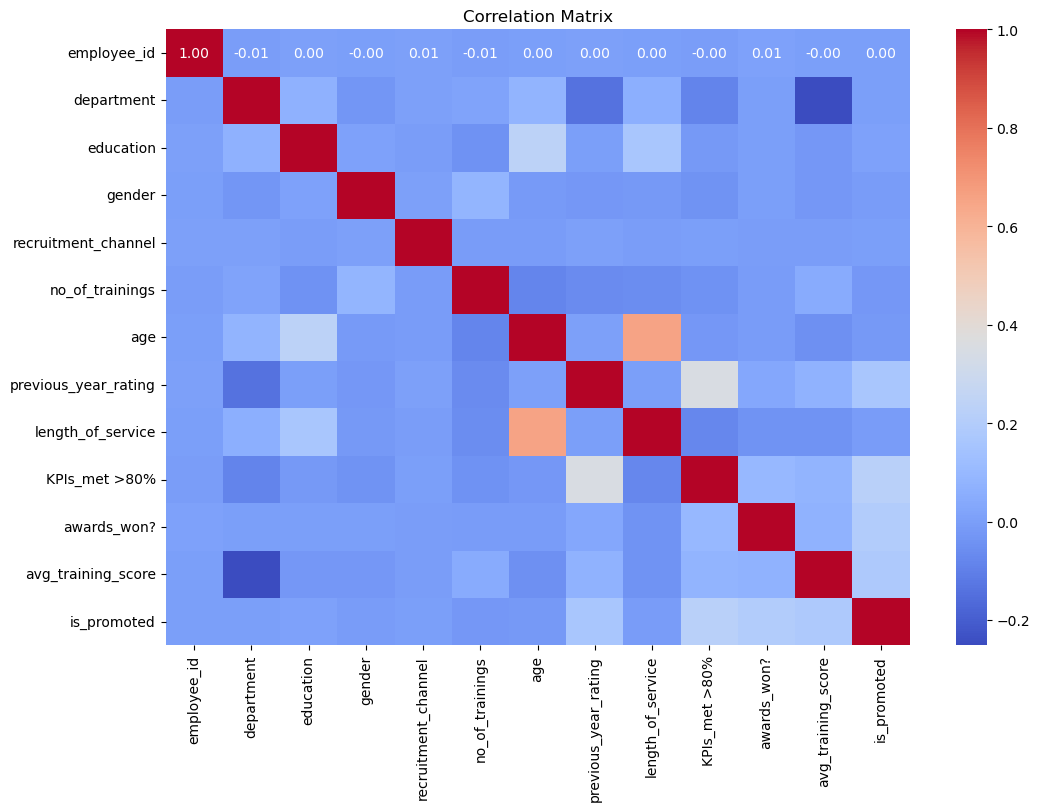

In [34]:
# Convert categorical features to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Exclude region columns
region_columns = [col for col in data_encoded.columns if 'region' in col]
data_encoded = data_encoded.drop(columns=region_columns)

# Compute the correlation matrix
correlation_matrix = data_encoded.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Pairwise relationships

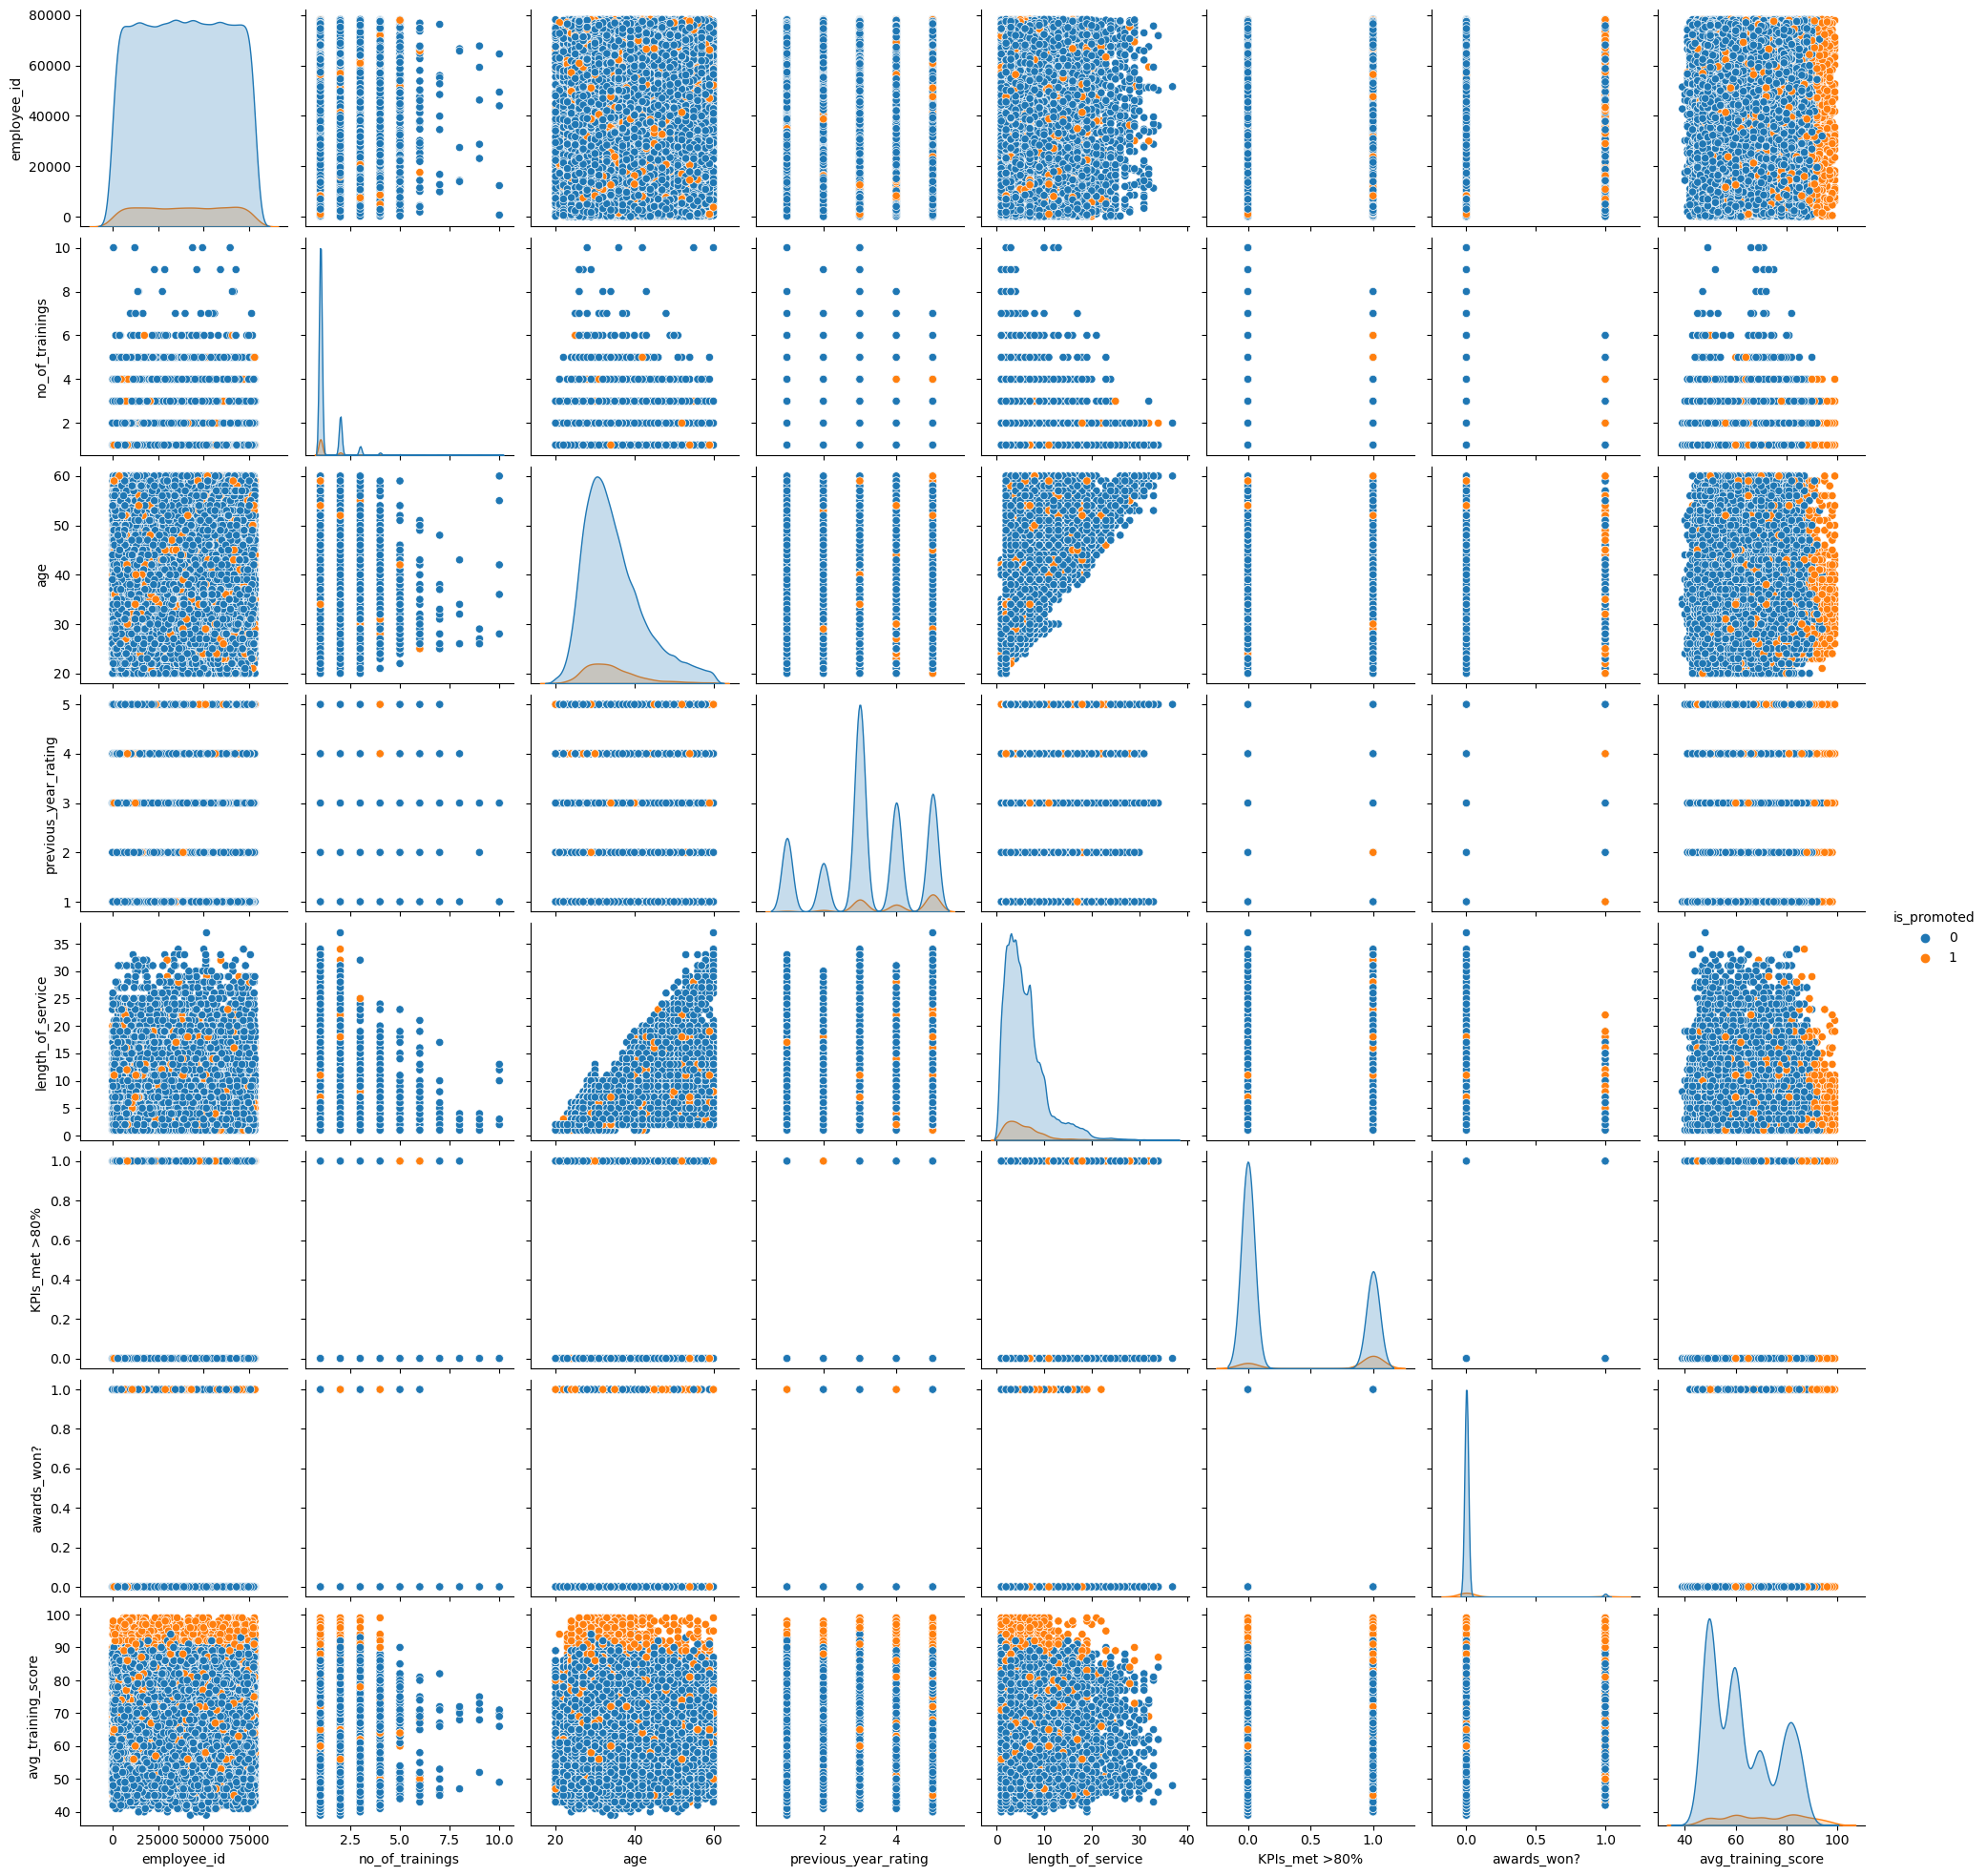

In [470]:
# Visualize pairwise relationships using pair plots
sns.pairplot(data, hue=target_column)
plt.show()

# 3. Check for Duplicate Rows from Train Data

In [36]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [employee_id, department, region, education, gender, recruitment_channel, no_of_trainings, age, previous_year_rating, length_of_service, KPIs_met >80%, awards_won?, avg_training_score, is_promoted]
Index: []


# 4. Fill/Impute Missing Values 

### - Continuous - Mean/Median/Any Specific Value Categorical - Others/ForwardFill/BackFill

In [388]:
# Fill missing values in continuous features with the mean
data['age'].fillna(data['age'].mean(), inplace=True)
data['no_of_trainings'].fillna(data['no_of_trainings'].mean(), inplace=True)
data['length_of_service'].fillna(data['length_of_service'].mean(), inplace=True)
data['avg_training_score'].fillna(data['avg_training_score'].mean(), inplace=True)

# Fill missing values in categorical features with the most frequent value
data['department'].fillna(data['department'].mode()[0], inplace=True)
data['region'].fillna(data['region'].mode()[0], inplace=True)
data['education'].fillna(data['education'].mode()[0], inplace=True)
data['gender'].fillna(data['gender'].mode()[0], inplace=True)
data['recruitment_channel'].fillna(data['recruitment_channel'].mode()[0], inplace=True)
data['is_promoted'].fillna(data['is_promoted'].mode()[0], inplace=True)


# 5. Feature Engineering

In [390]:
import pandas as pd

# Assuming your data is loaded into a DataFrame named 'data'

# 1. Check for Categorical Columns (Optional but helpful)
categorical_cols = data.select_dtypes(include=['object'])  # Identify categorical columns
if categorical_cols.empty:
    print("No categorical columns found in 'data' DataFrame. One-hot encoding not required.")
else:

    # 2. Convert Categorical Columns to One-Hot Encoding (if any)
    data['gender'] = data['gender'].apply(lambda x: 1 if x == "m" else 0)

    # 3. Create Dummy Variables (if categorical columns exist)
    cols = categorical_cols.columns  # Select only categorical columns for encoding
    ds = pd.get_dummies(data[cols], drop_first=True)

    # 4. Concatenate with Original Data (if categorical columns exist)
    data = pd.concat([data, ds], axis=1)

    # 5. Drop Original Categorical Columns (if categorical columns exist)
    data.drop(cols, axis=1, inplace=True)

No categorical columns found in 'data' DataFrame. One-hot encoding not required.


# 6. Split Train Data:

In [392]:
# Assuming your data is in a DataFrame named 'data'
X = data.drop('is_promoted', axis=1)  # Features
y = data['is_promoted']  # Target

In [394]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Data Scaling - MinMaxScaler, StandardScaler, RobustScaler

In [396]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Apply MinMaxScaler
#scaler = MinMaxScaler()
#X_minmax = scaler.fit_transform(X)

# Apply StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

# Apply RobustScaler
#scaler = RobustScaler()
#X_robust = scaler.fit_transform(X)

# 8. Create Baseline Machine Learning Model for the Binary Classification problem 

### DECISION TREE CLASSIFIER:

In [447]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_imputed, y_train)

# Evaluate the model
y_pred = model_dt.predict(X_test_imputed)

# Calculate precision, recall, accuracy, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)
print('F1 Score:', f1)

Precision: 0.38746438746438744
Recall: 0.44933920704845814
Accuracy: 0.8955482576172231
F1 Score: 0.41611422743498216


### Random Forest Classifier:

In [449]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Preserve the employee_id for the final output
employee_ids = data['employee_id']

# Convert categorical features to numerical values
le = LabelEncoder()
data['department'] = le.fit_transform(data['department'])
data['region'] = le.fit_transform(data['region'])
data['education'] = le.fit_transform(data['education'])
data['gender'] = le.fit_transform(data['gender'])
data['recruitment_channel'] = le.fit_transform(data['recruitment_channel'])

# Split the data into features (X) and target (y)
X = data.drop(['is_promoted', 'employee_id'], axis=1)
y = data['is_promoted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = rf.predict(X_test_imputed)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.9362342638204707
Precision: 0.8235294117647058
Recall: 0.29295154185022027
F1 Score: 0.4321689683184403


### Gradient Boosting Classifier:

In [451]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer


# Convert categorical features to numerical values
le = LabelEncoder()
data['department'] = le.fit_transform(data['department'])
data['region'] = le.fit_transform(data['region'])
data['education'] = le.fit_transform(data['education'])
data['gender'] = le.fit_transform(data['gender'])
data['recruitment_channel'] = le.fit_transform(data['recruitment_channel'])
data['is_promoted'] = le.fit_transform(data['is_promoted'])

# Split the data into features (X) and target (y)
X = data.drop('is_promoted', axis=1)
y = data['is_promoted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_gb.fit(X_train_imputed, y_train)

# Evaluate the model
y_pred = model_gb.predict(X_test_imputed)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.939792008757526
Precision: 0.9592592592592593
Recall: 0.2852422907488987
F1 Score: 0.4397283531409168


In [445]:
# Define the hyperparameters
n_estimators =1000
learning_rate = 0.15
max_depth = 4
min_samples_split = 2
min_samples_leaf = 1
max_features = 'sqrt'
random_state = 42

# Train the Gradient Boosting Classifier with the hyperparameters
model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate,
                                  max_depth=max_depth, min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf, max_features=max_features,
                                  random_state=random_state)
model.fit(X_train_imputed, y_train)

# Evaluate the model
y_pred = model.predict(X_test_imputed)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.9409779237365444
Precision: 0.8337595907928389
Recall: 0.3590308370044053
F1 Score: 0.501924557351809


# 9. Testing Gradient Boosting Classifier with the hyperparameters on test file.

In [404]:
# Import necessary packages 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load the test dataset
hr_test = '/Users/sahil/My Data/Boston Institue of Analytics/Machine learning/HR hackthon AV/test_2umaH9m (1).csv'
hr_test = pd.read_csv(test_file_path)


In [406]:
hr_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [408]:
hr_test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [410]:
hr_test.previous_year_rating.fillna(0, inplace = True)

In [412]:
hr_test.education.fillna(hr_test.education.mode()[0], inplace = True)

In [414]:
hr_test['region'] = hr_test['region'].apply(lambda x: int(x.split('_')[1]))

In [416]:
hr_test.department.unique()

array(['Technology', 'HR', 'Sales & Marketing', 'Procurement', 'Finance',
       'Analytics', 'Operations', 'Legal', 'R&D'], dtype=object)

In [418]:
hr_test.education.unique()

array(["Bachelor's", "Master's & above", 'Below Secondary'], dtype=object)

In [420]:
hr_test.recruitment_channel.unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [471]:
hr_test['department'] = pd.DataFrame(le.fit_transform(np.array(hr_test['department']).reshape(-1,1)))
hr_test['education'] = pd.DataFrame(le.fit_transform(np.array(hr_test['education']).reshape(-1,1)))
hr_test['recruitment_channel'] = pd.DataFrame(le.fit_transform(np.array(hr_test['recruitment_channel']).reshape(-1,1)))

In [424]:
hr_test.department.unique()

array([8, 2, 7, 5, 1, 0, 4, 3, 6])

In [426]:
hr_test.education.unique()

array([0, 2, 1])

In [428]:
hr_test.recruitment_channel.unique()

array([2, 0, 1])

In [430]:
hr_test['gender'] = pd.get_dummies(hr_test.gender, drop_first = True)

In [432]:
hr_test.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,26,0,True,2,1,24,0.0,1,1,0,77
1,74430,2,4,0,False,0,1,31,3.0,5,0,0,51
2,72255,7,13,0,True,0,1,31,1.0,4,0,0,47
3,38562,5,2,0,False,0,3,31,2.0,9,0,0,65
4,64486,1,29,0,True,2,1,30,4.0,7,0,0,61


In [472]:
y_pred2 = model.predict(hr_test)

In [455]:
output = pd.DataFrame({'employee_id': hr_test.employee_id,
                       'is_promoted': y_pred2})

In [457]:
output.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [459]:
output.to_csv('/Users/sahil/My Data/Boston Institue of Analytics/Machine learning/HR hackthon AV/output.csv', index=False)